In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
data = pd.read_csv("./NIFTY50/HDFC_BANK.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume,VWAP
0,03-01-2000,16.600000,17.000000,16.600000,17.000000,14.130294,332590.0,16.86666667
1,04-01-2000,18.200001,18.344999,17.100000,17.379999,14.446147,1687100.0,17.60833267
2,05-01-2000,17.000000,17.389999,16.500000,16.695000,13.876776,1598200.0,16.86166633
3,06-01-2000,16.799999,17.000000,16.530001,16.830000,13.988990,850260.0,16.786667
4,07-01-2000,16.215000,17.100000,16.215000,16.834999,13.993143,851440.0,16.71666633
...,...,...,...,...,...,...,...,...
5868,19-06-2023,1611.000000,1614.250000,1598.349976,1604.150024,1604.150024,12414573.0,1605.583333
5869,20-06-2023,1604.150024,1611.000000,1590.650024,1607.500000,1607.500000,10002813.0,1603.050008
5870,21-06-2023,1616.000000,1637.250000,1611.000000,1635.599976,1635.599976,12154473.0,1627.949992
5871,22-06-2023,1640.000000,1657.550049,1639.050049,1643.599976,1643.599976,28298070.0,1646.733358


In [56]:
start = -320
end = -300

rawOpen = data["Open"][start:end]
# print(data["Open"])
meanOpen = rawOpen.mean()
stdOpen = rawOpen.std()
open = np.array((rawOpen-meanOpen)/stdOpen)
# sop[np.isnan(sop)]=0


rawHigh = data["High"][start:end]
meanHigh = rawHigh.mean()
stdHigh = rawHigh.std()
high = np.array((rawHigh-meanHigh)/stdHigh)
# high[np.isnan(high)]=0
# high

rawLow = data["Low"][start:end]
meanLow = rawLow.mean()
stdLow = rawLow.std()
low = np.array((rawLow-meanLow)/stdLow)

rawClose = data["Close"][start:end]
meanClose = rawClose.mean()
stdClose = rawClose.std()
close = np.array((rawClose-meanClose)/stdLow)

rawVolume = data["Volume"][start:end]
meanVolume = rawVolume.mean()
stdVolume = rawVolume.std()
volume = np.array((rawVolume-meanVolume)/stdVolume)

In [67]:
def multiGradient(w, b, alp, x, y):
    m = len(x[0])  
    # print(m)
    n_features = len(w)
    
    dj_dws = np.zeros(n_features)
    for i in range(n_features):
        dj_dws[i] = (1/m) * np.sum(x[i] * (w[i] * x[i] + b - y))
    
    new_ws = np.zeros(n_features)
    for i in range(n_features):
        new_ws[i] = w[i] - alp * dj_dws[i]
        
    dj_db = (1/m) * np.sum((np.dot(w, x) + b - y))
    
    new_b = b - alp * dj_db

    return new_ws, new_b


x = np.array([open,open**,close**2,close**3,volume,volume**2])
y = high
# print(x,y)
w = np.zeros(x.shape[0])
b = 0

for i in range(100000):
    w,b = multiGradient(w,b,0.0001,x,y)
print(w,b)
    

[0.92199164 0.49083728 0.16852292 0.77257147 0.27627983] -1.0839169249735356


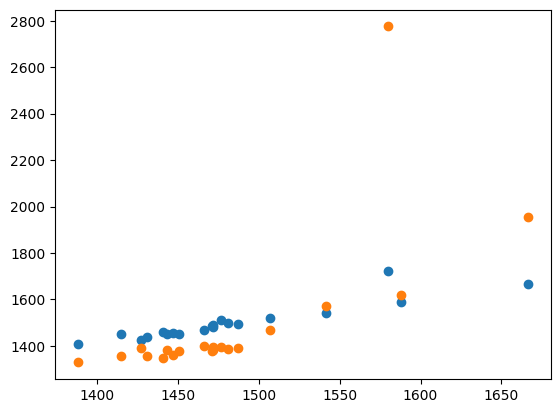

In [68]:
plt.scatter(rawOpen,rawHigh)
plt.scatter(rawOpen,(np.dot(w,x)+b)*stdHigh+meanHigh)
plt.show()